<a href="https://colab.research.google.com/github/33quitykubby/Rabbit/blob/main/Rabbit_ML_4_kNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighborモデル

k近傍法(写経）
np_knn.ipynb



# マウント

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 日本時間にする

In [81]:
  !rm /etc/localtime
  !ln -s /usr/share/zoneinfo/Asia/Tokyo /etc/localtime
  !date

Sat Apr 10 16:10:47 JST 2021


# ライブラリのインポート

In [82]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import  confusion_matrix
from sklearn.decomposition import PCA
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

#これでplt.show()しなくてよい
%matplotlib inline

import os
import glob

import librosa

import datetime

import gc

In [83]:
#開始時刻
start_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
print("start_time=",start_time)

start_time= 2021-04-10 16:10:47.538354+09:00


# 乱数シードの初期化






In [84]:
import os 
import numpy as np
from sklearn import model_selection
import tensorflow as tf
import random

COMMON_SEED = 0
STANDARD_SEED = 0
NP_SEED = 0
TF_SEED = 0 

# np.random.seed(STANDARD_SEED)
# random.seed(NP_SEED)
# tf.random.set_seed(TF_SEED)

def seed_everything():
    random.seed(STANDARD_SEED)
    os.environ['PYTHONHASHSEED'] = str(COMMON_SEED)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    np.random.seed(NP_SEED)
    tf.random.set_seed(TF_SEED)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1
    )
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)


In [85]:
#乱数シード固定

seed_everything()

# パス定義

In [86]:
DATA_PATH = '/content/drive/MyDrive/RabbitChallenge/study_ai_ml_google/data/'
SIZE = 10

# 訓練データ生成

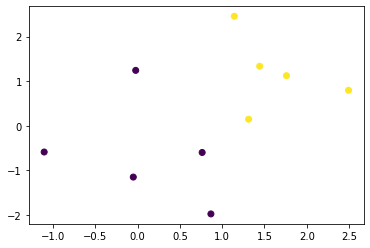

In [87]:
x0 = np.random.normal(size=SIZE).reshape(-1, 2) - 1
x1 = np.random.normal(size=SIZE).reshape(-1, 2) + 1

X_train = np.concatenate([x0,x1])
ys_train = np.concatenate([np.zeros(int(SIZE/2)), np.ones(int(SIZE/2))]).astype(np.int)

plt.scatter(X_train[:, 0], X_train[:,1], c=ys_train)


# 予測

## numpy

In [88]:
def distance(x1, x2):
  return np.sum((x1-x2)**2, axis=1) #二乗距離

def knc_predict(n_neighbors, X_train, y_train, X_test):
  y_pred = np.empty(len(X_test), dtype=y_train.dtype)
  for i, x in enumerate(X_test):

    #X_testのデータを一つずつ、全X_trainとの距離を比較しdistances配列に入れる
    distances = distance(x, X_train)

    # argsort()で距離の近い順に並べたインデックスを得る
    nearest_index = distances.argsort()[:n_neighbors] 

    # 上位n_neigbors番目までの要素のy_trainの最頻値を求める
    mode, _ = stats.mode(y_train[nearest_index])

    # 最頻値をリストに入れる
    y_pred[i] = mode
  
  return y_pred

def plt_result(x_train, y_train, y_pred):
  xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
  xx = np.array([xx0, xx1]).reshape(2,-1).T
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
  plt.contourf(xx0, xx1, y_pred.reshape(100,100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0,1,3) )

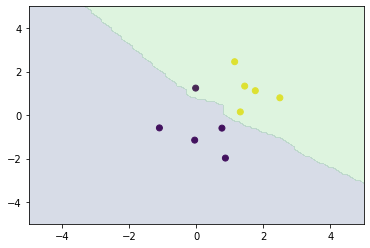

In [89]:
n_neighbors = 3

# [-5, 5]を100分割した格子列を生成しX_testとする
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)) 
X_test = np.array([xx0, xx1]).reshape(2,-1).T

# print(X_test.shape)
# print(X_test)

# kNNでX_testを判定
y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)

# print(y_pred.shape)
# print(y_pred)

# グラフ化
plt_result(X_train, ys_train, y_pred)

## scikitlearn

In [90]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)) 

X_test = np.array([xx0, xx1]).reshape(2,-1).T

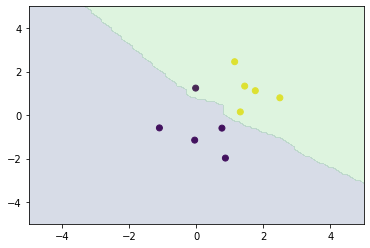

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)

plt_result(X_train, ys_train, knc.predict(X_test))

# 終わり

In [92]:
#終了時刻
finish_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
print("finish_time=",finish_time)
print("total_time=",finish_time-start_time)


finish_time= 2021-04-10 16:10:49.826782+09:00
total_time= 0:00:02.288428
